In [1]:
#importing Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# I have written consolidated insights at the end of the notebook 

In [2]:
data = pd.read_csv('haberman.csv')

In [3]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
data.shape

(306, 4)

In [5]:
data.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [7]:
data.isnull().sum()
#no null value present 

age       0
year      0
nodes     0
status    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


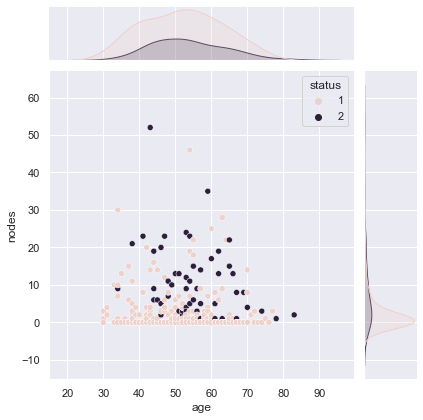

In [20]:
sns.set(style="darkgrid")
sns.jointplot(x='age',y='nodes',data = data,hue='status',color='k')

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


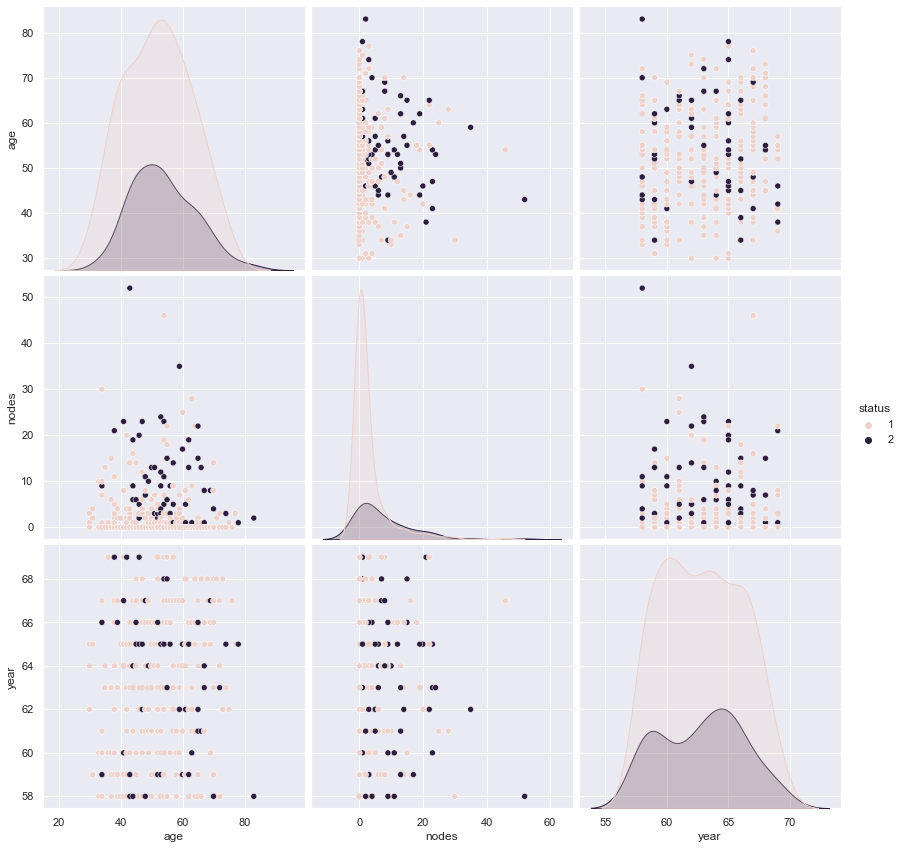

In [19]:
sns.pairplot(data=data,hue='status',vars=['age','nodes','year'],size =4)

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


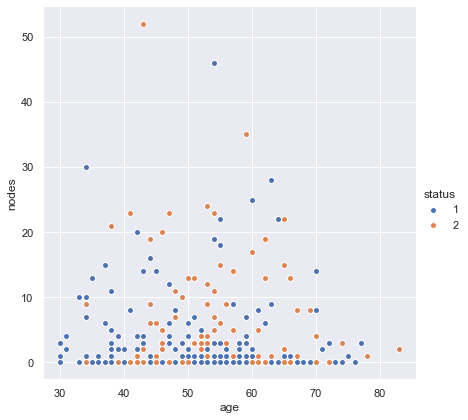

In [23]:
graph = sns.FacetGrid(data,hue='status',size=6).map(plt.scatter,'age','nodes',edgecolor='w').add_legend()
plt.show()

# PDF of AGE

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


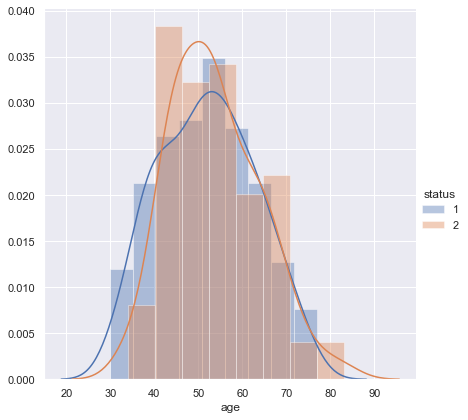

In [27]:
# PDF will be helpful
graph = sns.FacetGrid(data,hue='status',size=6).map(sns.distplot,'age').add_legend()

# PDF of Year

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


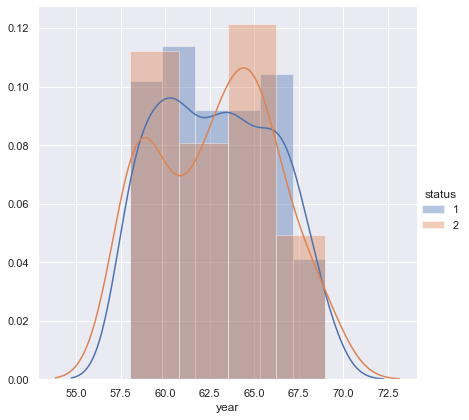

In [28]:
graph = sns.FacetGrid(data,hue='status',size=6).map(sns.distplot,'year').add_legend()

# PDF for Nodes

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


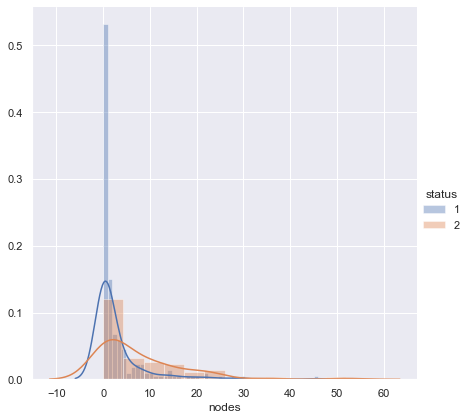

In [29]:
graph = sns.FacetGrid(data,hue='status',size=6).map(sns.distplot,'nodes').add_legend()

# CDF for the AGE
we will go ahead and check separately for the status 1 and 2 

In [30]:
long_survive = data[data['status']==1]

In [31]:
short_survive =data[data['status']==2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


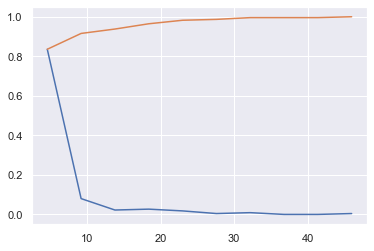

In [32]:
#long survive CDF
counts, bin_edges = np.histogram(long_survive['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


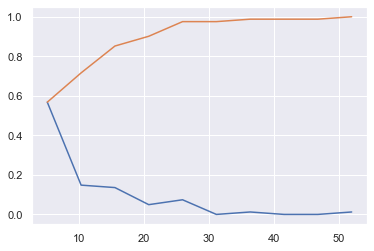

In [35]:
# Short survive CDF
counts, bin_edges = np.histogram(short_survive['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


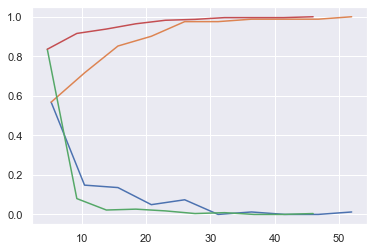

In [36]:
# Short survive CDF
counts, bin_edges = np.histogram(short_survive['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

#long survive CDF
counts, bin_edges = np.histogram(long_survive['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

In [38]:
# Means
print('MEANS')
print(np.mean(long_survive['nodes']))
print(np.mean(short_survive['nodes']))
print("Standard Deviation")
print(np.std(long_survive['nodes']))
print(np.std(short_survive['nodes']))


MEANS
2.7911111111111113
7.45679012345679
Standard Deviation
5.857258449412131
9.128776076761632


In [39]:
# this plot shows that the probability of surviving less than 5 is more 
# here the short survival data has more spread than the long survival 

In [41]:
print('MEDIANS')
print(np.median(long_survive['nodes']))
print(np.median(short_survive['nodes']))
print('\n QUANTILES')
print(np.percentile(long_survive['nodes'],np.arange(0,100,25)))
print(np.percentile(short_survive['nodes'],np.arange(0,100,25)))
print('\n 90th Percentiles')
print(np.percentile(long_survive['nodes'],90))
print(np.percentile(short_survive['nodes'],90))

MEDIANS
0.0
4.0

 QUANTILES
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

 90th Percentiles
8.0
20.0


In [42]:
# till 75th percentile for long survival no of nodes should be 0 
# Avg no of nodes for short survival is 4 
# in short survival case 75th percentile of patients have nodes < 11 
# at 90th percentile data if nodes >8 then long survival and if nodes >20 then short survival 

# Let's do analysis using BOX PLOT 

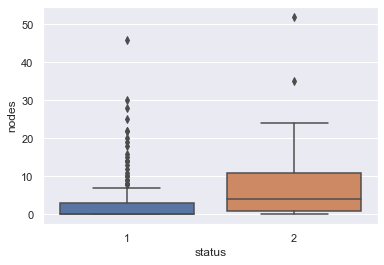

In [43]:
sns.boxplot(x='status',y='nodes',data = data)
plt.show()

In [ ]:
# in long survival all the 0th 25th and 50th percentile coincide at the same point 
# in the short survival case the 50th percentile is more than the long survival 75th percentile 

# Let's do analysis using VIOLIN PLOT 

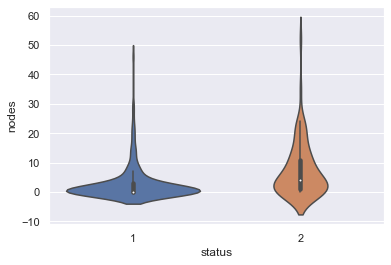

In [44]:
sns.violinplot(x='status',y='nodes',data = data)
plt.show()

## Our final Plot 
# CONTOUR PLOT 

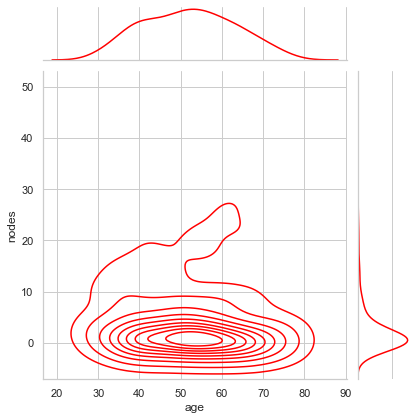

In [49]:
sns.set_style('whitegrid')
sns.jointplot(x='age',y='nodes',data = long_survive, kind ='kde',color = 'red')
plt.grid()
plt.show()

In [ ]:
#Long survival age is between 45-60 and the no. of nodes between 0-3

# Insights  
status 1 survival >= 5 yrs  status 2 survival <5 yrs 
1. not clear separtion is seen in the age and operation year hence this pair need not to be analysed 
2. Similar case with the nodes and years 
3. we can find still some separation with the age and nodes lets explore this pair further 
4. for age b/w 42 and above the survival rate more than 5 years is not there it means below 42 years curing rate is more
5. for number of nodes less than equal 4 recovery rate is better patient is surving >5 years  
6. this plot shows that the probability of surviving less than 5 is more according to the mean data 
7. here the short survival data has more spread than the long survival a/c to the STD Deviation data  
8. till 75th percentile for long survival no of nodes should be 0   
9. Avg no of nodes for short survival is 4 
10. in short survival case 75th percentile of patients have nodes < 11  
11. at 90th percentile data if nodes >8 then long survival and if nodes >20 then short survival  
12. in long survival all the 0th 25th and 50th percentile coincide at the same point 
13. in the short survival case the 50th percentile is more than the long survival 75th percentile 
14. Long survival age is between 45-60 and the no. of nodes between 0-3
